<a href="https://colab.research.google.com/github/Katrinayang3/Github_test/blob/master/CTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import dask.dataframe as dask_data

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

import sklearn
import matplotlib.dates as mdates
matplotlib.style.use('ggplot')

#A parse date variable to pass in the read_csv function later to take into account the date format 
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# A sample dataset of 100k lines.
!ls '/content/drive/My Drive/train_data'

train_data = pd.read_csv('/content/drive/My Drive/train_data/train.csv', parse_dates = ['hour'], date_parser = parse_date)

train_data.info()

train_data_clicks = train_data[train_data['click']==1]

train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
id                  100000 non-null float64
click               100000 non-null int64
hour                100000 non-null datetime64[ns]
C1                  100000 non-null int64
banner_pos          100000 non-null int64
site_id             100000 non-null object
site_domain         100000 non-null object
site_category       100000 non-null object
app_id              100000 non-null object
app_domain          100000 non-null object
app_category        100000 non-null object
device_id           100000 non-null object
device_ip           100000 non-null object
device_model        100000 non-null object
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 

In [0]:
train_data.describe()


,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.500813e+18,0.174900,1005.034410,0.19830,1.055730,0.199270,17682.145900,318.333960,56.818920,1964.034380,0.789350,131.734480,37874.227610,88.555670
std,5.669410e+18,0.379883,1.088741,0.40264,0.583993,0.635268,3237.735265,11.931939,36.924104,394.962696,1.223761,244.076787,48546.274316,45.482841
min,3.237563e+13,0.000000,1001.000000,0.00000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.183340e+18,0.000000,1005.000000,0.00000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.074496e+19,0.000000,1005.000000,0.00000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.457542e+19,0.000000,1005.000000,0.00000,1.000000,0.000000,20362.000000,320.000000,50.000000,2306.000000,2.000000,39.000000,100083.000000,156.000000
max,1.844670e+19,1.000000,1010.000000,5.00000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [0]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


0    0.8251
1    0.1749
Name: click, dtype: float64

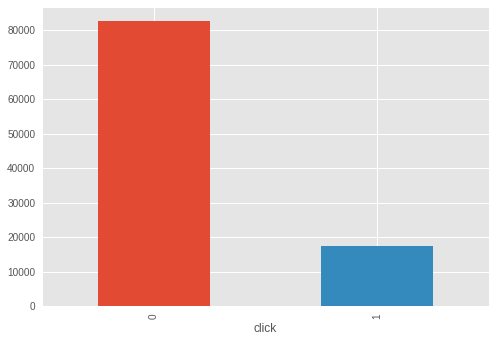

In [0]:
# Click v/s No click distribution
train_data.groupby('click').size().plot(kind = 'bar')
rows = train_data.shape[0]
click_through_rate = train_data['click'].value_counts()/rows 
click_through_rate

In [0]:
# For illustration purpose, I only choose data from a single day...
# Hence, not a good metric for CTR in this example.
train_data.hour.describe() 

count                  100000
unique                      1
top       2014-10-21 00:00:00
freq                   100000
first     2014-10-21 00:00:00
last      2014-10-21 00:00:00
Name: hour, dtype: object

In [0]:
# banner position
"""Banner positions representing attractive and appealing designs that might highly 
affect a user's behavior and in turn trigger their decision to click. Or not. 
Hence making it an effective metric to predict clicks"""
train_data['banner_pos'].unique()

array([0, 1, 4, 5, 2])

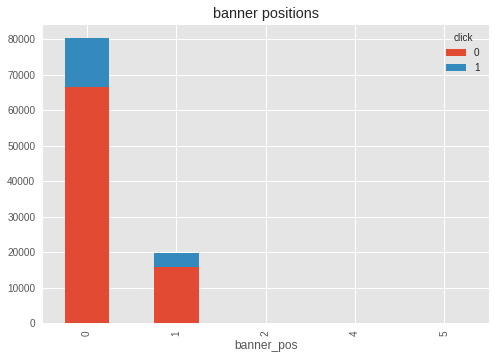

In [0]:
banner_temp =train_data[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [0]:
train_data[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,80249
1,19714
2,21
5,10
4,6


In [0]:
banner_df = pd.DataFrame()
banner_df['position'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['banner_pos']
banner_df['pos_clicks'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']
banner_df['total_impressions'] = train_data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']
banner_df['click_pct'] = 100*banner_df['pos_clicks']/banner_df['total_impressions']
banner_df

,position,pos_clicks,total_impressions,click_pct
0,0,13599,80249,16.946006
1,1,3883,19714,19.696662
4,5,4,10,40.000000
2,2,3,21,14.285714
3,4,1,6,16.666667


In [0]:
banner_df.sort_values(ascending=False,by='click_pct')

,position,pos_clicks,total_impressions,click_pct
4,5,4,10,40.000000
1,1,3883,19714,19.696662
0,0,13599,80249,16.946006
3,4,1,6,16.666667
2,2,3,21,14.285714


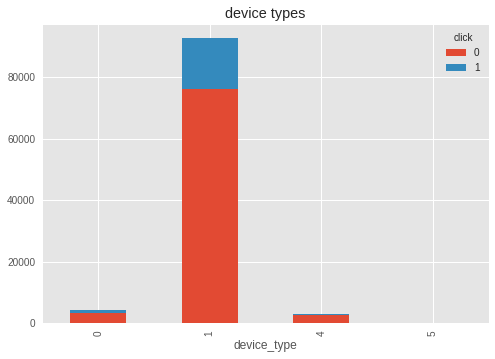

In [0]:
# Device type metric
device_temp = train_data[['device_type','click']].groupby(['device_type','click'])
device_temp.size().unstack().plot(kind='bar',stacked=True, title='device types')

In [0]:
train_data[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,92597
0,4212
4,2979
5,212


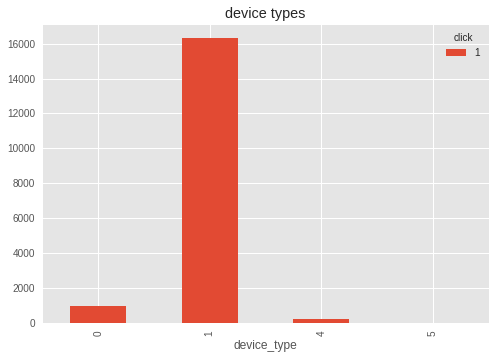

In [0]:
train_data_clicks[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',stacked=True, title='device types')

In [0]:
dev_type_df = train_data_clicks.groupby('device_type').agg({'click':'sum'}).reset_index()
dev_type_df_total_imp = train_data.groupby('device_type').agg({'click':'count'}).reset_index()
dev_type_df['total_impressions'] = dev_type_df_total_imp['click']
dev_type_df['success_pct'] = (dev_type_df['click']/dev_type_df['total_impressions'])*100
dev_type_df

,device_type,click,total_impressions,success_pct
0,0,958,4212,22.744539
1,1,16295,92597,17.597762
2,4,216,2979,7.250755
3,5,21,212,9.905660


In [0]:
# App Related Metrics
app_features = ['app_id', 'app_domain', 'app_category']
train_data.groupby('app_category').agg({'click':'sum'}).sort_values(by='click',ascending = False)

,click
app_category,
07d7df22,15297
0f2161f8,1514
f95efa07,445
8ded1f7a,109
cef3e649,57
d1327cf5,23
75d80bbe,14
dc97ec06,13
4ce2e9fc,7


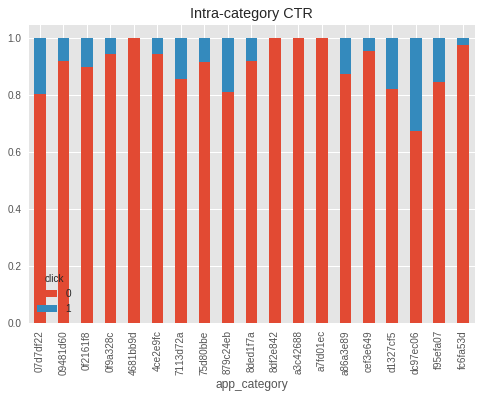

In [0]:
# Clicks behavior across different app categories
train_app_category = train_data.groupby(['app_category', 'click']).size().unstack()
train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR")

In [0]:
# C1, C14-C21 features
features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18',
            'C20', 'C21']
train_data[features].astype('object').describe()

,C1,C14,C15,C16,C17,C18,C20,C21
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,6,420,5,6,128,4,137,29
top,1005,20596,320,50,1722,0,-1,79
freq,92454,6809,95133,95621,38456,69496,62162,38456


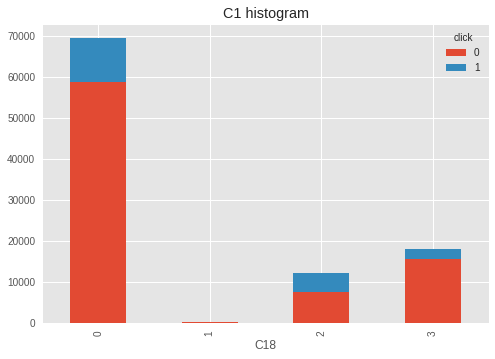

In [0]:
# train_data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
# train_data.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
# train_data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')

In [0]:
model_features = ['banner_pos', 'site_category', 'device_conn_type', 'app_category','device_type', 'C14', 'C17']
model_target = 'click'
train_model = train_data[model_features+[model_target]].sample(frac=0.1)

In [0]:
def one_hot_features(data_frame, feature_set):
    new_data_frame = pd.get_dummies(data_frame,
                                     columns = feature_set,
                                    sparse = True)

    return new_data_frame

In [0]:
train_model = one_hot_features(train_model,
                                ['site_category',
                                 'app_category',
                                 'banner_pos'])
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [0]:
# Extracting all columns from the train model except the target mask column
model_features = np.array(train_model.columns[train_model.columns!=model_target].tolist())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    train_model[model_features].values,
    train_model[model_target].values,
    test_size=0.3,
)

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score

# F1 score used as a performance metric
num_splits = 3
c_values = np.logspace(-2, 0, 5)
stratified_k_fold = StratifiedKFold(n_splits=num_splits)
scores = np.zeros(5)
nr_params = np.zeros(5)

In [0]:
for train_data, valid_data in stratified_k_fold.split(x_train,
                                                      y_train):
    for i, c in enumerate(np.logspace(-2, 0, 5)):
        lr_classify = LogisticRegression(penalty='l2',
                                         class_weight='balanced',
                                         C = c, max_iter=1000)
        lr_classify.fit(x_train[train_data],
                        y_train[train_data])

        #validation_Set evaluation

        y_prediction = lr_classify.predict(x_train[valid_data])
        score_f1 = f1_score(y_train[valid_data],
                            y_prediction, average='weighted' )

        scores[i] += score_f1 / num_splits

        ### spot the selected parameters ##

        model_selected = SelectFromModel(lr_classify, prefit=True)
        nr_params[i] += np.sum(model_selected.get_support()) / num_splits

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logis

Text(0, 0.5, 'Avg F1 score')

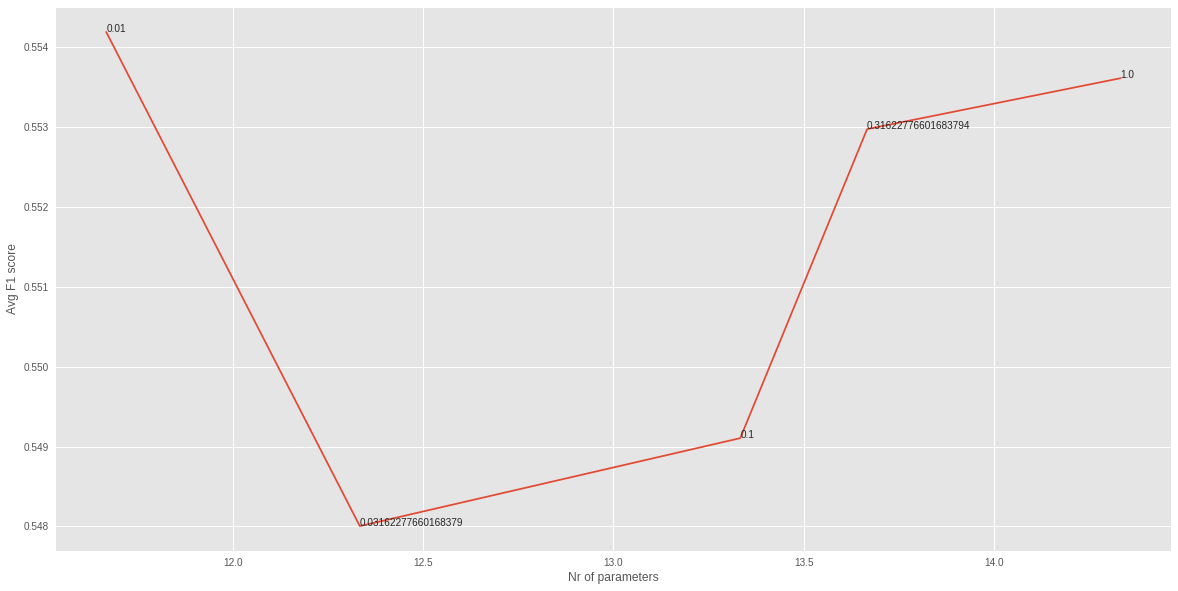

In [0]:
plt.figure(figsize=(20, 10))
plt.plot(nr_params, scores)

for i, c in enumerate(c_values):
    plt.annotate(c, (nr_params[i], scores[i]))
plt.xlabel("Nr of parameters")
plt.ylabel("Avg F1 score")

In [0]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


x_train, x_valid, y_train, y_valid = train_test_split(
    x_train,
    y_train,
    stratify=y_train,
    test_size=0.1)


xgb_clf = XGBClassifier()

xgb_clf.fit(x_train, y_train, early_stopping_rounds=10,
            eval_metric="logloss", eval_set=[(x_valid, y_valid)])

[0]	validation_0-logloss:0.652119
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.619066
[2]	validation_0-logloss:0.591487
[3]	validation_0-logloss:0.567851
[4]	validation_0-logloss:0.548378
[5]	validation_0-logloss:0.532106
[6]	validation_0-logloss:0.518663
[7]	validation_0-logloss:0.507773
[8]	validation_0-logloss:0.498611
[9]	validation_0-logloss:0.490702
[10]	validation_0-logloss:0.483898
[11]	validation_0-logloss:0.478229
[12]	validation_0-logloss:0.473224
[13]	validation_0-logloss:0.469434
[14]	validation_0-logloss:0.46582
[15]	validation_0-logloss:0.463052
[16]	validation_0-logloss:0.460437
[17]	validation_0-logloss:0.458529
[18]	validation_0-logloss:0.456734
[19]	validation_0-logloss:0.455587
[20]	validation_0-logloss:0.454629
[21]	validation_0-logloss:0.45354
[22]	validation_0-logloss:0.452775
[23]	validation_0-logloss:0.452234
[24]	validation_0-logloss:0.451817
[25]	validation_0-logloss:0.451396
[26]	validation_0-logloss:0.451105

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_pred = xgb_clf.predict(x_test)
predictions = [round(value) for value in y_pred]
print(classification_report(y_test,
                            predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2502
           1       0.59      0.02      0.04       498

   micro avg       0.83      0.83      0.83      3000
   macro avg       0.71      0.51      0.47      3000
weighted avg       0.80      0.83      0.77      3000

